In [65]:
import pandas as pd
import statsmodels.api as sm

from matplotlib import pyplot as plt 

In [9]:
df = pd.read_csv("../data/data.csv", index_col=[0])
df = df[(df["merchant"] == "Bestbuy.com") & (df["Category_name"] == "laptop, computer")].reset_index(drop=True)

df = df[["Date_imp", "name", "disc_price"]]
df.columns = ["date", "name", "price"]

df["date"] = pd.to_datetime(df["date"])

In [26]:
display(df[["price"]].describe().T)
display(df[["date"]].describe().T)

,count,mean,std,min,25%,50%,75%,max
price,1071.0,1305.921242,824.839081,1.0,649.99,1296.99,1799.99,4399.99


,count,mean,min,25%,50%,75%,max
date,1071,2017-06-15 11:51:52.605042176,2017-01-24 00:00:00,2017-04-04 04:00:00,2017-06-01 19:00:00,2017-08-12 03:00:00,2017-12-07 10:00:00


I Will use all available data for price elasticity in a granularity of a week.

In [28]:
df["week"] = df["date"].dt.isocalendar()["week"]

dfp = df.groupby(["name", "week"]).agg({"price": "mean", "date": "count"}).reset_index()

dfp.head(5)

,name,week,price,date
0,"12 MacBook (Mid 2017, Gold)",30,1599.99,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.99,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.99,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.99,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.49,4


In [39]:
df_price = dfp.pivot(
    index="week",
    values="price",
    columns="name"
)

df_price.fillna(df_price.median(), inplace=True)

df_demand = dfp.pivot(
    index="week",
    values="date",
    columns="name"
)

df_demand.fillna(0, inplace=True)

display(df_price.head())
display(df_demand.head())

name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week,,,,,,,,,,,,,,,,,,,,,
4,1551.99,1299.99,415.495,949.99,2618.99,2353.99,304.99,829.99,249.000,1899.99,...,819.99,463.74,218.49,601.49,415.99,337.49,2399.99,853.74,4179.99,610.99
9,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,236.495,1599.99,...,799.99,499.99,218.49,664.99,379.99,316.99,2399.99,807.49,4179.99,617.49
10,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,238.995,1899.99,...,819.99,429.99,229.99,664.99,474.99,335.99,2399.99,949.99,4179.99,617.49
11,1551.99,1299.99,415.495,949.99,2715.99,2482.99,304.99,829.99,249.000,1899.99,...,819.99,463.74,218.49,601.49,474.99,383.99,2399.99,853.74,4179.99,569.99
13,1551.99,1299.99,449.000,949.99,2547.99,2353.99,304.99,849.99,223.995,1899.99,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,4179.99,591.49


name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,4.0,0.0,3.0,6.0,0.0,2.0,4.0,1.0,...,1.0,2.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,2.0
10,0.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0
11,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0
13,0.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,2.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0


#### Price Elasticity MacBook Gold

In [91]:
price = df_price["12 MacBook (Mid 2017, Silver)"]
demand = df_demand["12 MacBook (Mid 2017, Silver)"]

display(price.describe())
display(demand.describe())

x = sm.add_constant(price)

lr = sm.OLS(demand, x).fit()

lr.summary()

count      26.00000
mean     1295.99000
std        14.60137
min      1234.99000
25%      1299.99000
50%      1299.99000
75%      1299.99000
max      1299.99000
Name: 12 MacBook (Mid 2017, Silver), dtype: float64

count    26.000000
mean      0.384615
std       0.637302
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: 12 MacBook (Mid 2017, Silver), dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     12 MacBook (Mid 2017, Silver)   R-squared:                       0.196
Model:                                       OLS   Adj. R-squared:                  0.163
Method:                            Least Squares   F-statistic:                     5.852
Date:                           Fri, 13 Sep 2024   Prob (F-statistic):             0.0235
Time:                                   15:39:53   Log-Likelihood:                -21.833
No. Observations:                             26   AIC:                             47.67
Df Residuals:                                 24   BIC:                             50.18
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            25.4291     10.354      2.456      0.022       4.060      46.798
12 MacBook (Mid 2017, Silver)    -0.0193      0.008     -2.419      0.024      -0.036      -0.003
==============================================================================
Omnibus:                       11.642   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.337
Skew:                           1.451   Prob(JB):                      0.00569
Kurtosis:                       4.057   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

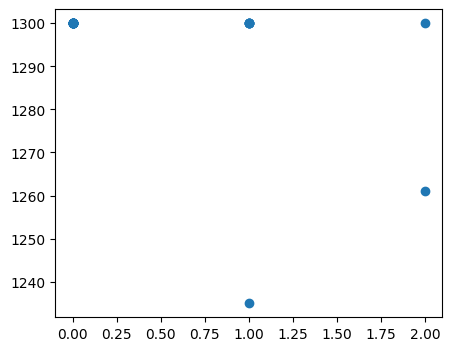

In [77]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(demand, price);

In [84]:
intercept, slope = lr.params

elasticity = slope * price.mean() / demand.mean()

In [104]:
def compute_new_demand(
    current_price,
    current_demand,
    new_price,
    elasticity
):
    var_pct_price = (new_price - current_price) / current_price * 100
    var_pct_demand = elasticity * var_pct_price
    return current_demand * (1 + var_pct_demand / 100)

for price_sample in [1500, 1300, 1295, 1200, 1000]:

    new_demand = compute_new_demand(
        current_price=price.mean(),
        current_demand=demand.sum(),
        new_price=price_sample,
        elasticity=elasticity
    )

    print(f"Demand: {new_demand:.4f}, price: {price_sample} -> {new_demand * price_sample}")

Demand: -92.5026, price: 1500 -> -138753.87804878005
Demand: 7.9852, price: 1300 -> 10380.785365853817
Demand: 10.4974, price: 1295 -> 13594.151951219666
Demand: 58.2291, price: 1200 -> 69874.94634146345
Demand: 158.7169, price: 1000 -> 158716.9268292681
